# Using BLE RSSI Values to Classify Proximity with Deep Neural Networks

In [1]:
import numpy as np
import pandas as pd
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import visualkeras
import matplotlib.pyplot as plt

In [2]:
model_name = '1denselayers_hiddenlayersize64'
hidden_layer_size = 64

In [3]:
df = pd.read_csv("rssi_dataset_3.csv")

In [4]:
df

,Unnamed: 0,rssi,target
0,0,-96,0
1,1,-69,1
2,2,-100,0
3,3,-97,0
4,4,-93,0
...,...,...,...
20451,20451,-73,1
20452,20452,-97,0
20453,20453,-87,0
20454,20454,-71,1


In [5]:
train_labels = df['target']
train_samples = df['rssi']

In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [7]:
scaled_train_samples = train_samples.reshape(-1,1)

In [8]:
print(scaled_train_samples)

[[ -96]
 [ -69]
 [-100]
 ...
 [ -87]
 [ -71]
 [ -87]]


In [9]:
print(train_labels)

[0 1 0 ... 0 1 0]


## Simple tf.keras Sequential Model

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, DenseFeatures
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow import lite
from keras.utils import plot_model

In [11]:
physial_devices = tf.config.experimental.list_physical_devices('GPU')
print("Available: ", len(physial_devices))

Available:  0


In [12]:
model = Sequential([
    Dense(units=hidden_layer_size, input_shape=(1,), activation='relu'),
    Dropout(rate = 0.1),
    Dense(units=2, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________


In [14]:
visualkeras.layered_view(model, to_file= 'visualkeras/' + model_name + '.png')

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.2, batch_size=10, epochs=75, shuffle=True, verbose=2)

Epoch 1/75
1637/1637 - 1s - loss: 1.4122 - accuracy: 0.7257 - val_loss: 0.7711 - val_accuracy: 0.8170
Epoch 2/75
1637/1637 - 1s - loss: 0.9829 - accuracy: 0.7275 - val_loss: 0.5862 - val_accuracy: 0.8170
Epoch 3/75
1637/1637 - 1s - loss: 0.7367 - accuracy: 0.7449 - val_loss: 0.4404 - val_accuracy: 0.8170
Epoch 4/75
1637/1637 - 1s - loss: 0.5789 - accuracy: 0.7674 - val_loss: 0.4004 - val_accuracy: 0.8170
Epoch 5/75
1637/1637 - 1s - loss: 0.4894 - accuracy: 0.7887 - val_loss: 0.3927 - val_accuracy: 0.8170
Epoch 6/75
1637/1637 - 1s - loss: 0.4422 - accuracy: 0.8037 - val_loss: 0.3854 - val_accuracy: 0.8170
Epoch 7/75
1637/1637 - 1s - loss: 0.4144 - accuracy: 0.8076 - val_loss: 0.3791 - val_accuracy: 0.8170
Epoch 8/75
1637/1637 - 1s - loss: 0.4004 - accuracy: 0.8082 - val_loss: 0.3779 - val_accuracy: 0.8170
Epoch 9/75
1637/1637 - 1s - loss: 0.3860 - accuracy: 0.8081 - val_loss: 0.3614 - val_accuracy: 0.8170
Epoch 10/75
1637/1637 - 1s - loss: 0.3712 - accuracy: 0.8080 - val_loss: 0.3454 - 

In [17]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


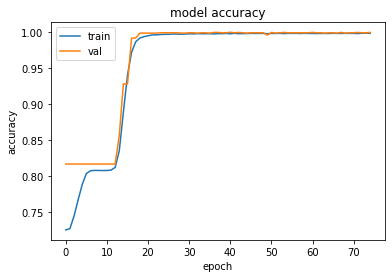

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('plots/accuracy_' + model_name + '.png')
plt.show()

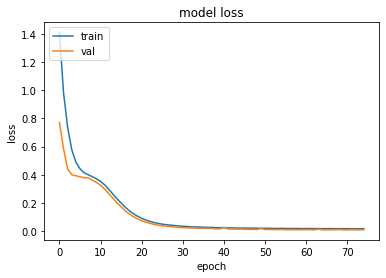

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.ylim(.55 , .65)
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('plots/loss_' + model_name + '.png')
plt.show()

## Predict

## Export Model

In [20]:
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("model_1_64.tflite", "wb").write(tfmodel)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\KAVINDA\AppData\Local\Temp\tmpxj0t6hbj\assets


2344